Léa TRIN
Marine PAPET


# Cable sous-marin

## Questions théoriques


### Question 1

La loi des grands nombres nous autorise à estimer l'espérance conditionnelle par la moyenne empirique de simulations conditionnelles

### Question 2

2) La densité du vecteur des composantes de Z correspondant aux points de discrétisation sans observation , connaissant les valeurs prises par les composantes aux sites d'obersvation est : 

On note X le vecteur aléatoire à n composantes :
\begin{align}
X = (X_{j_{1}}, ..., X_{j_{n}})
\end{align}

\begin{align}
f_{Z|X=x}(z)=\frac{1}{(2\pi)^{n/2}\sqrt{det(CS_{Z})}}exp(-\frac{1}{2}(z-g(x))^{t}CS_{Z}^{-1}(z-g(x))
\end{align}

Donc le vecteur aléatoire Z|X=x est gaussien, de matrice de covariance :

\begin{align} CS_{Z} = \Sigma - Cov(Z,X)C_{X}^{-1}Cov(X,Z)\end{align}
Avec sigma la matrice de covariance de Z

Et d'espérance conditionnelle : 
\begin{align} g(x) = m_{Z}-Cov(Z,X)C_{X}^{-1}(x-m_{X})\end{align}


### Question 3 

Si Y=(Y1,Y2,...,Yp) est un vecteur de composantes gaussiennes indépendantes toutes d'espérance nulle et de variance 1 ( on notera C la matrice de covariance de ce vecteur), alors le vecteur Z= m +RY est gaussien d'espérance m par linéarité de l'espérance : 
\begin{align}
E(Z)=E(m+RY)=m
\end{align}

Et sa matrice de covariance est \begin{align}
C = R^{T}R
\end{align}

### Question 4 

Ainsi, le vecteur Z gaussien peut être simulé à partir de la simple simulation d'un vecteur gaussien Y de même taille centré réduit (on peut obtenir cette simulation en exploitant soit le théorème de la limite centrale sur un grand nombre de simulation de variable aléatoire indépendantes suivant une loi uniforme sur [-1;1]). 


Il faut ensuite trouver les matrices m et R convenant , donc telles que : 
\begin{align}
m_{Z} = m
\end{align}
\begin{align}
\Sigma = R^{T}R
\end{align}

Le choix de m est donc trivial. 
Pour ce qui est de R, l'existence de la matrice est donnée par la preuve de la factorisation de Cholesky et peut facilement être obtenue via Pyhton. 


## Implémentation


In [2]:

import numpy as np
from numpy.linalg import inv
import math 
import matplotlib.pyplot as plt


In [3]:
#Discrétisation
A=0
B=500
N=101 #Nombre de points de discrétisation
Delta=(B-A)/(N-1)
discretization_indexes=np.arange(N)
discretization = discretization_indexes*Delta

#Paramètres du modèle
mu=-5
a = 50
sigma2 = 12

#Données 
observation_indexes = (0, 20, 40, 60, 80, 100)
depth = np.array([0,-4, -12.8, -1, -6.5, 0])

#indices des composantes correspondant aux observations et aux composantes non observées
unknow_indexes=list(set(discretization_indexes)-set(observation_indexes))



###  Question 1 : calcul de la matrice de covariance 

In [4]:
def  covariance (h, a ,sigma_carre):
    return sigma_carre*math.exp(-abs(h)/a)

def covariance_matrice(Mh, a, sigma2):
    lignesMh=len(Mh)
    colonnesMh=len(Mh[0])
    M=np.zeros((lignesMh, colonnesMh))
    for i in range(lignesMh):
        for j in range(colonnesMh):
            M[i][j]=covariance(Mh[i][j], a , sigma2)
    return M


### Question 2 : calcule de la matrice de distance 

In [5]:
def matrice_distance (delta,p): 
    mh=np.zeros((p, p))
    for  i in range(p):
        for j in range (p):
            mh[i][j]=abs(i-j)*delta #distance positive
    return mh

#La matrice de distance sera donc notée M :

M = matrice_distance(Delta, N)


### Question 3 : Calcul de la matrice de covariance de Z 

In [6]:
## Il ne reste plus qu'a utiliser les fonctions précédentes 
C = covariance_matrice(M, a, sigma2)

### Question 4 : Extraction des 3 matrices de covariance

In [7]:
#extraction de la matrice de covariance entre les observations, c'est à dire Cov(X, X)

def cov_obs (C, observation_indexes) :
    n = len(observation_indexes)
    C_obs=np.zeros((n,n))
    p=0
    k=0
    for i in observation_indexes:
        for j in observation_indexes:
            C_obs[p][k]=C[i][j]
            k+=1
        k=0
        p+=1
    return C_obs

C_obs = cov_obs(C, observation_indexes)


In [8]:
#extraction de la matrice de covariance entre les inconnues, soit C(Z, Z)
def cov_inc(C, unknown_indexes) :
    n = len(unknow_indexes)
    C_inc=np.zeros((n, n))
    p=0
    k=0
    for i in unknow_indexes:
        for j in unknow_indexes:
            C_inc[p][k]=C[i][j]
            k+=1
        k=0
        p+=1
    return C_inc

C_inc = cov_inc(C, unknow_indexes)


In [9]:
#extraction de la matrice de covariante entre les observations et les inconnues, soit Cov(Z, X)
def cov_incobs(C, unknow_indexes, observation_indexes) :
    n = len(unknow_indexes)
    m = len(observation_indexes)
    C_incobs=np.zeros((n,m))
    p=0
    k=0
    for i in unknow_indexes:
        for j in observation_indexes:
            if i<j:
                C_incobs[p][k]=C[i][j]
            k+=1
        k=0
        p+=1
    return C_incobs
    
C_incobs = cov_incobs(C, unknow_indexes, observation_indexes)


### Question 5 : On calcule l'espérance conditionnelle

In [10]:
#calcul de l'espérance conditionnelle

esp_obs=[mu for i in range(6)] #vecteur espérance des observations
esp_inc=[mu for i in range(95)] # vecteur espérance des inconnues

C_obsinv=inv(C_obs) # on calcul l'inverse de la matrice de covariance des observables
produit_intermediaire=np.dot(C_incobs,C_obsinv) #on effectue un calcul intermédiaire pour calculer le produit entre C(Z,X) et la matrice inverse de la covariance des observations
produit_intermediaire

esp_conditionelle=esp_inc-np.dot(produit_intermediaire,(depth-esp_obs)) # d'après la formule établie dans la partie théorique

### Question 6 : On calcule la matrice de variance conditionnelle

In [11]:
C_obsinc = np.transpose(C_incobs) #soit C(X,Z)
C_condi = C_inc-np.dot(produit_intermediaire, C_obsinc) #calcul de la variance conditionnelle

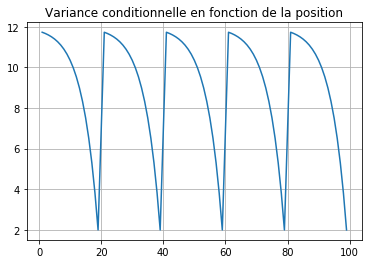

In [12]:
taille_Ccondi= len(C_condi)
diago_Ccondi=[C_condi[i][i] for i in range(taille_Ccondi)]
xp=unknow_indexes
plt.plot(xp,diago_Ccondi)
plt.title("Variance conditionnelle en fonction de la position")
plt.grid()
plt.show()

On observe que la variance chute avant les points d'observations, puis augmente à nouveau en s'en éloignant, ce qui est cohérent avec l'intuition.

### Question 7 : Simulation conditionnelle

In [13]:
## On commence par effectuer la simulation conditionnelle
R= np.linalg.cholesky(C_inc) # calcul de la matrice R

#simulation Y
from scipy.stats import norm
Y=norm.rvs(size=N-6) # on utilise la focntion python qui donne directement le vecteur avec N-6 variable centrée réduite 

#simulation Z
Z_simulation = esp_conditionelle + np.dot(R,Y)

Text(0.5, 1.0, 'Affichage des résultats')

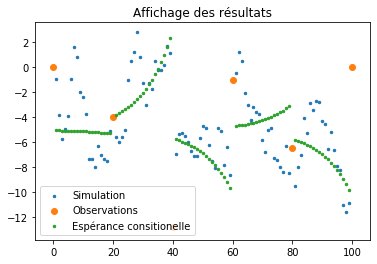

In [14]:
## On effectue les tracés
plt.scatter(unknow_indexes, Z_simulation, 6, label = "Simulation")
plt.legend()
plt.scatter(observation_indexes, depth, label= "Observations")
plt.legend()
plt.scatter(unknow_indexes, esp_conditionelle, 6, label="Espérance consitionelle")
plt.legend()
plt.title("Affichage des résultats")

### Question 8 : Calcul de la longueur du câble

In [15]:
def longueur_cable(pas, Z, obs = observation_indexes, prof = depth):
    l=0
    vecteur_z_final = [-19 for i in range (101)] #on crée un vecteur avec N composantes de valeur -19 (valeur quelconque mais utile pour la suite)
    p,k = 0, 0
    for i in range(len(obs)) : #pour chaque indice dont la position est connu on attribue la valeur stockée dans le vecteur des profondeur connue
        vecteur_z_final[obs[i]] = prof[i]
    j=0
    for i in range (101) :
        if vecteur_z_final[i] == -19 :#dans le cas où l'indice ne correspond pas à une profondeur connue
            vecteur_z_final[i] = Z[j]
            j+= 1    
    for i in range(len(vecteur_z_final)-1):
        l+=(pas**2+(vecteur_z_final[i+1]-vecteur_z_final[i])**2)**(1/2) 
    return l     

### Question 9 : Calcul de la longueur du câble 

In [16]:
def simuler_z (esp_conditionelle, R) :
    Y=norm.rvs(size=N-6)
    Z_simulation = esp_conditionelle + np.dot(R,Y) #en utilisant la formule de la question théorique 3
    return Z_simulation

In [17]:
def L_etoile(n): # avec n le nombre de simulation
    p=0
    for i in range(n):
        Z1=simuler_z(esp_conditionelle, R)
        p+=longueur_cable(Delta, Z1)
    return p/n

print("Différence entre l'espérance conditionnelle et L* = ")
L_etoile(100) - longueur_cable(Delta, esp_conditionelle)

Différence entre l'espérance conditionnelle et L* = 


25.091428998724382

Les deux grandeurs sont proches alors que l'espérance conditionnelle a demandé bien moins de calcul ! Elle permet donc d'approcher L* de manière remarquablement efficace en terme de temps de calcul, cependant, sa finesse ne peut être améliorée.

### Question 10 : 

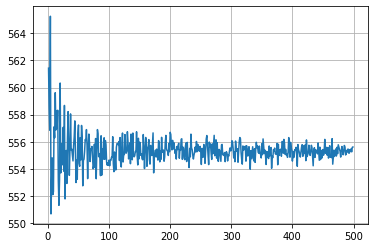

In [18]:
nb=[i for i in range(1, 500)] #nombre de simulation entre 1 et 499
Mn=[L_etoile(n) for n in nb ]
plt.plot(nb,Mn)
plt.grid()

On constate donc que lorsque le nombre de simulations grandit la longueur du cable tend vers une valeur de 555 m.


### Question 11 :

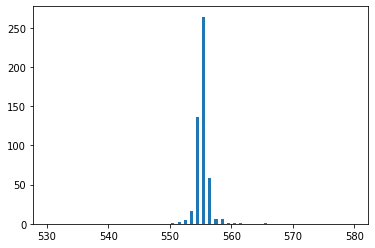

In [19]:
res = plt.hist(Mn, range = (530, 580), bins = 50, rwidth = 0.5)


L'histogramme montre bien de la même manière que la valeur des longueur de cable calculée se concentre autour de 555m. On peut donc supposer que la longueur de cable nécéssaire réelle se situe autour de cette valeur la.

### Question 12

Première méthode : 

Dans le cas de 100 simulations:
On peut approcher l'intervalle de confiance en utilisant le théorème centrale limite. En effet on peut considérer que les l(k) sont toutes des variables aléatoires d'espérance L*(100) (dont la valeur ne varie que de manière négligeable selon les différentes situations, de l'ordre du dizième de millimètre pour un câble de plusieurs centaines de mètres) et dont l'écart type peut être estimé de la manière suivante : 

In [39]:
def tableau_longueur(n): # avec n le nombre de simulation
    p=[]
    for i in range(n):
        Z1=simuler_z(esp_conditionelle, R)
        p.append(longueur_cable(Delta, Z1))
    return p

def ecart_type(p):
    esp_X2=0
    for i in range(len(p)):
        esp_X2+=p[i]**2
    esp_X2 = esp_X2/len(p)
    return esp_X2-(L_etoile(len(p))**2)



  En utilisant le théorème centrale limite on en déduit que la longueur du cable peut être approché par une variable aléatoire suivant une loi normale d'espérance L_etoile et d'écart type ecart_type/racine(100)
  Donc l'intervalle de confiance à 95% peut être donné par :

In [45]:
h=tableau_longueur(100)


born_inf=L_etoile(100)-2*ecart_type(h)/100**(1/2)
born_sup=L_etoile(100)+2*ecart_type(h)/100**(1/2)

intervalle95=[born_inf, born_sup]
intervalle95

[462.2820184101745, 566.2769059870336]

Deuxième méthode en utilisant le module scipy.stats de python

In [43]:
import scipy.stats as st
simul_100=[i for i in range(1, 101)] #pour 100 simulations
Mn_100=[L_etoile(n) for n in simul_100 ]

st.t.interval(0.95, len(Mn_100)-1, loc=np.mean(Mn_100), scale=st.sem(Mn_100))

(555.101245592825, 555.8820298038094)

La seconde méthode, plus fiable, nous donne un intervalle de confiance à 95% suffisament fin pour conclure que nous connaissons de manière suffisament fine la longueur de câble nécessaire, puisque l'incertitude sur la longueur d'un câble de plus de 500 mètres est bien supérieure à la largeur de notre intervalle de confiance.

### Question 13

In [46]:
#on calcule dans les 100 simulations le nombre de longueur supérieur à 525:
k=0
for i in Mn_100:
    if i>525:
        k+=1
#ainsi la probabilité que la longueur dépasse 525m peut être approchée par :
proba=k/100

### Question 14

Nos ordinateurs respectifs n'étant pas assez puissant pour effectuer plus de calculs, nous n'avons pas recopier les codes pour 1000, 10000 et 100000 simulations. Cependant il s'agissait en réalité juste de modifier Mn et simul avec le bon nombre de simulations.On pourrait d'autre part s'attendre à un rétrécissement de l'intervalle de confiance à 95% quand le nombre de simulations augmente. 